In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [30]:
df = pd.read_excel('./knn.xlsx')

In [31]:
X = df.iloc[:, :4].values
Y = df.iloc[:, -1].values
classes = np.unique(Y)

In [32]:
Xtrain, Ytrain = X[:8], Y[:8]
Xtest, Ytest = X[8:], Y[8:]

In [33]:
Xtrain

array([[1, 1, 4, 4],
       [3, 0, 5, 1],
       [1, 0, 0, 5],
       [2, 5, 0, 1],
       [2, 1, 1, 2],
       [4, 3, 3, 3],
       [0, 1, 0, 2],
       [3, 4, 4, 4]], dtype=int64)

In [34]:
Xtest

array([[4, 1, 4, 3],
       [3, 1, 3, 3],
       [2, 1, 2, 1],
       [3, 2, 3, 4],
       [1, 5, 3, 1],
       [4, 2, 0, 1],
       [1, 1, 4, 3],
       [3, 0, 0, 0]], dtype=int64)

In [37]:
from collections import Counter
def knn(x, X, Y, k=1):
    i = np.argsort(np.sqrt(np.sum(abs(X-x)**2, axis=1)))[:k]


    d = dict(Counter(Y[i]))
    k = np.array(list(d.keys()))
    j = np.argsort(k)
    k = k[j]
    v = np.array(list(d.values()))
    v = v[j]
    return k[np.argmax(v)]

---
---
---
---
---
---
---
---
[0.25  0.375 0.25  0.25  0.25  0.375 0.125 0.25 ]


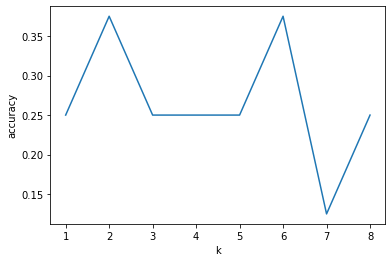

In [38]:
acc = np.zeros(len(Xtest))
K = np.arange(1, len(Xtest)+1)
for k in K:
  print('---')
  correct = 0
  for x,y in zip(Xtest, Ytest):
    z = knn(x, Xtrain, Ytrain,k)
    if z == y :
      correct += 1
  acc[k-1] = correct/len(Xtest)

plt.xlabel('k')
plt.ylabel('accuracy')
plt.plot(K, acc)
print(acc)